# Investating and Improving Movie Production

Movies have been being produced for 127 years, lending itself to a massive collection of data associated with those movies. It is in the best interest of Computing Vision to follow these guidelines in order to produce movies of a higher quality that produce higher net profit.

Based on the data collected by `IMDB`, `The Numbers`, `The Movie Data Base`, and `Box Office Mojo`, we are able to determine that there are three major areas of interest that Computing Vision should focus on in order to maximize profits of their newly created content. The top three metrics are as follows:
* Release Month
* Director
* Writer

We will be diving into Release month and its impact on net profit. Before we can do that there are some standard modules that we will use to demonstrate the impact of these metrics.

In [11]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

conn = sqlite3.connect('data/im.db')

## Release Month
If we aggregate data from the IMDB database and The Numbers database we can determine which months have the movies that average the most profit.

### Step 1 - Pull the data from the database

In [8]:
month_agg_data = pd.read_sql("""
SELECT SUBSTR(release_date, 0, 4) as month, AVG(worldwide_gross - production_budget) as mean_net_profit
FROM movie_budgets
GROUP BY month
ORDER BY mean_net_profit DESC;
""", conn)
month_agg_data

,month,mean_net_profit
0,May,1.151328e+08
1,Jun,9.942391e+07
2,Jul,9.841746e+07
3,Nov,9.314157e+07
4,Dec,6.844157e+07
5,Mar,4.985129e+07
6,Feb,4.349811e+07
7,Apr,3.611743e+07
8,Aug,3.542232e+07
9,Oct,2.907190e+07


### Step 2 - Displaying the Aggregated Data
From this we can see that releasing movies during the summer months will generally see a higher profit than releasing movies during the back to school season or January after Christmas break. We can show this with a bar plot indicating the relative average net profit.

<AxesSubplot:xlabel='month'>

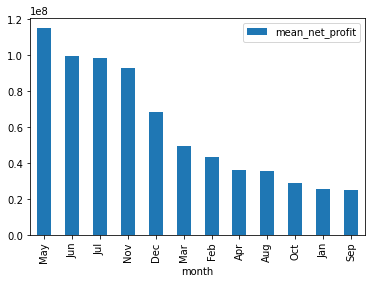

In [9]:
month_agg_data.plot.bar(x='month', y = 'mean_net_profit')

### Step 3 Generating Non-Aggregated Data
In order to further investigate whether or not the samples we've gather here actually represent a fluctuation in the average net profit for the entire population, we must conduct an ANOVA test in order to reject the null hypothesis that the population mean for `May` is in fact significantly different than the population mean for `September`. In order to perform this test we need non-aggregated data for each of the 12 months.

In [10]:
month_data = pd.read_sql("""
SELECT SUBSTR(release_date, 0, 4) as month, (worldwide_gross - production_budget) as net_profit
FROM movie_budgets;
""", conn)
month_data

,month,net_profit
0,Dec,2351345279
1,May,635063875
2,Jun,-200237650
3,May,1072413963
4,Dec,999721747
...,...,...
5777,Dec,-7000
5778,Apr,234495
5779,Jul,-3662
5780,Sep,-1400


With this data we can use the scipy module to perform an ANOVA test that shows whether or not there is a significant difference between the population means of the categorical variables.

In [12]:
jan = month_data[month_data.month == 'Jan'].net_profit
feb = month_data[month_data.month == 'Feb'].net_profit
mar = month_data[month_data.month == 'Mar'].net_profit
apr = month_data[month_data.month == 'Apr'].net_profit
may = month_data[month_data.month == 'May'].net_profit
jun = month_data[month_data.month == 'Jun'].net_profit
jul = month_data[month_data.month == 'Jul'].net_profit
aug = month_data[month_data.month == 'Aug'].net_profit
sep = month_data[month_data.month == 'Sep'].net_profit
oct = month_data[month_data.month == 'Oct'].net_profit
nov = month_data[month_data.month == 'Nov'].net_profit
dec = month_data[month_data.month == 'Dec'].net_profit

f_oneway(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

F_onewayResult(statistic=24.453383228456943, pvalue=4.995036106067499e-50)

With a miniscule p value, we can with confidence rejec the null hypothesis and conclude that there is in fact a significant difference between the population means of the different groups, indicating that there is merit to releasing movies during the summer months as opposed to months such as September or January.

## Director